In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

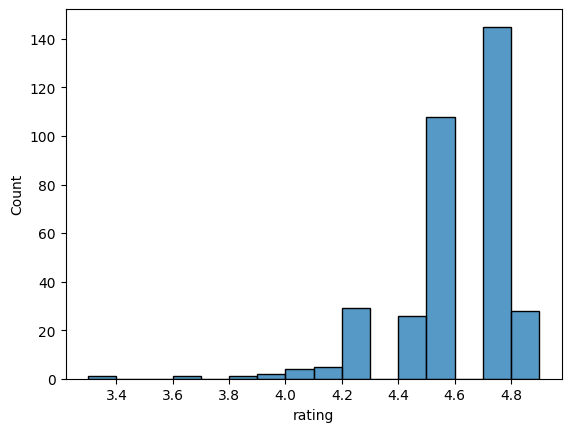

In [3]:
books = pd.read_csv('clean_books.csv')
sns.histplot(data=books, x='rating', binwidth=0.1)
plt.show()

In [4]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


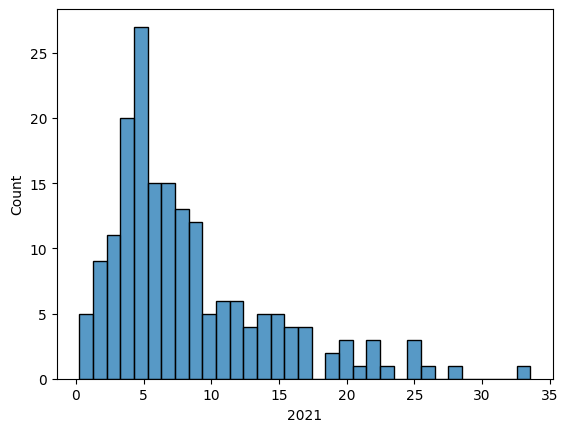

In [5]:
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

In [6]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [7]:
books[~books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens


In [8]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


<Axes: xlabel='year'>

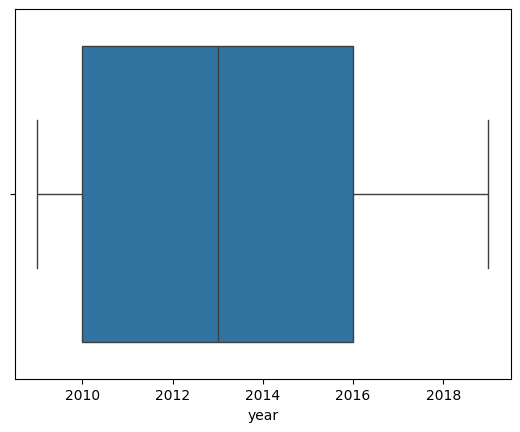

In [9]:
sns.boxplot(data=books, x='year')

<Axes: xlabel='year', ylabel='genre'>

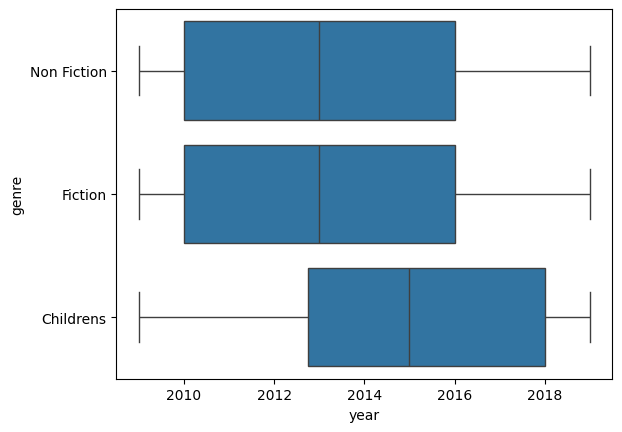

In [10]:
sns.boxplot(data=books, x='year', y='genre')

In [11]:
not_oceania = unemployment[~unemployment["continent"].isin(["Oceania"])].head()
not_oceania

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [12]:
not_oceania['2021'].max()
print(not_oceania['2021'].max(),"\n")
not_oceania['2021'].min()
print(not_oceania['2021'].min(),"\n")

13.28 

3.36 



<Axes: xlabel='2021', ylabel='continent'>

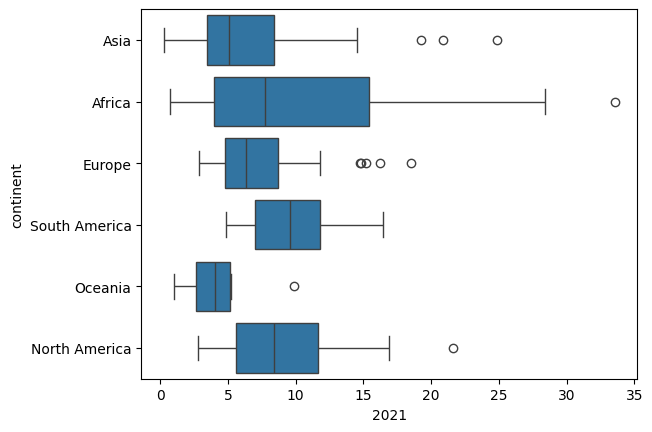

In [13]:
sns.boxplot(data=unemployment, x='2021', y='continent')

In [14]:
books.groupby('genre').mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [15]:
numeric_cols = list(books.select_dtypes(include=np.number).columns)
books[numeric_cols].agg(["mean", "std"], numeric_only=True)

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [16]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


In [17]:
year_cols = list(unemployment.select_dtypes(include=np.number).columns)
unemployment[year_cols].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [18]:
unemployment.groupby('continent')[year_cols].agg(['mean', 'std'])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [19]:
continent_summary = unemployment.groupby('continent').agg(
    mean_rate_2021=("2021", "mean"),
    std_rate_2021=("2021", "std")
)
continent_summary

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


<Axes: xlabel='continent', ylabel='2021'>

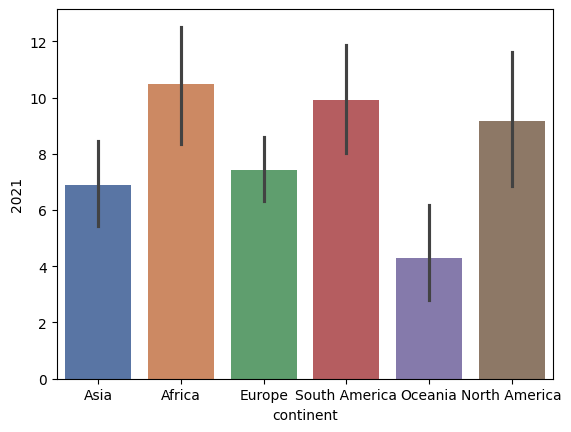

In [20]:
sns.barplot(data=unemployment, x='continent', y='2021', hue='continent', palette='deep', legend=False)

In [21]:
salaries = pd.read_csv('ds_salaries_clean.csv')
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


In [22]:
planes = pd.read_csv('Airlines_unclean.csv', index_col=0)
planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 999.4+ KB


In [23]:
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [24]:
threshold = len(planes) * 0.05
print(threshold)

533.0


In [25]:
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')


In [26]:
planes.dropna(subset=cols_to_drop, inplace=True)

In [27]:
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


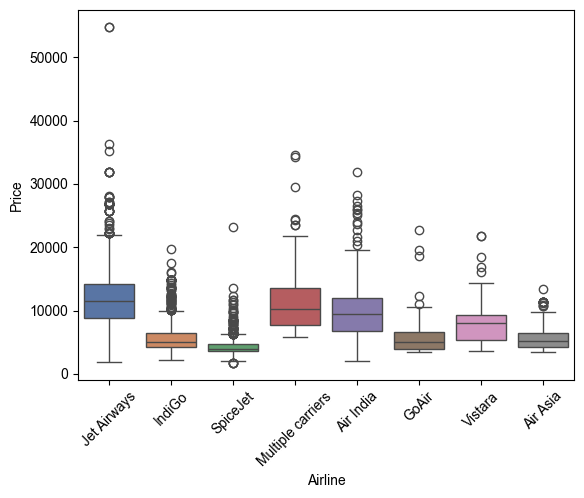

In [28]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price', hue='Airline', palette='deep', legend=False) 
sns.set(rc={"figure.figsize":(8, 6)}) #width=8, #height=6
plt.xticks(rotation=45)
plt.show()

In [29]:
planes = planes.drop(columns=['Additional_Info'])
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Price              368
dtype: int64


In [30]:
# Group planes by airline and calculate the median price
airline_prices = planes.groupby('Airline')['Price'].median()

# Convert the grouped median prices to a dictionary
prices_dict = airline_prices.to_dict()

# Print the dictionary
print(prices_dict)

# Conditionally impute missing values for "Price" by mapping values in the "Airline column" based on prices_dict
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# Check for remaining missing values
print(planes.isna().sum())

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [31]:
salaries.select_dtypes("object").head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


50
Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='Designation')


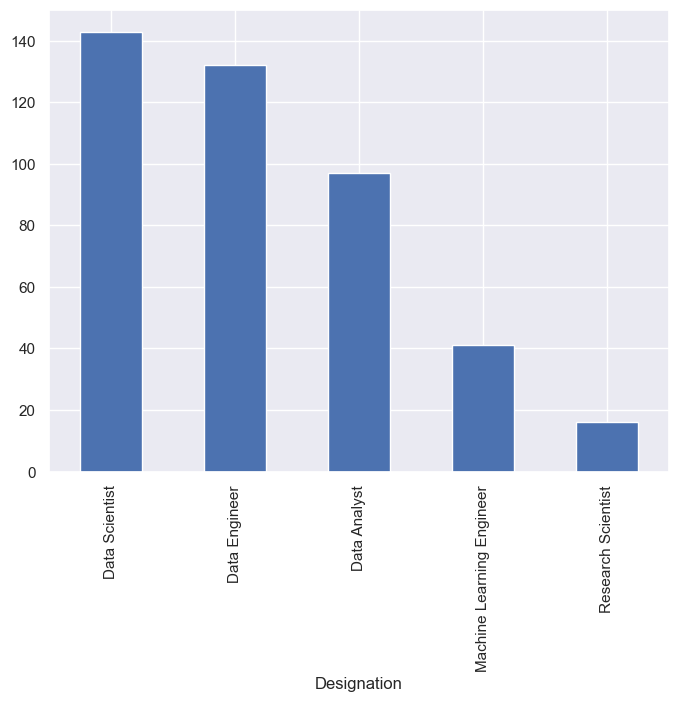

In [33]:
print(salaries["Designation"].nunique())

salaries_count = salaries["Designation"].value_counts().iloc[0:5]
print(salaries_count.index)
salaries_count.plot(kind='bar')
plt.show()

In [32]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [33]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")
# Loop through columns
for col in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [34]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

  Duration Duration_Category
0      19h            Medium
1   5h 25m            Medium
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m            Medium


<Axes: xlabel='Duration_Category', ylabel='count'>

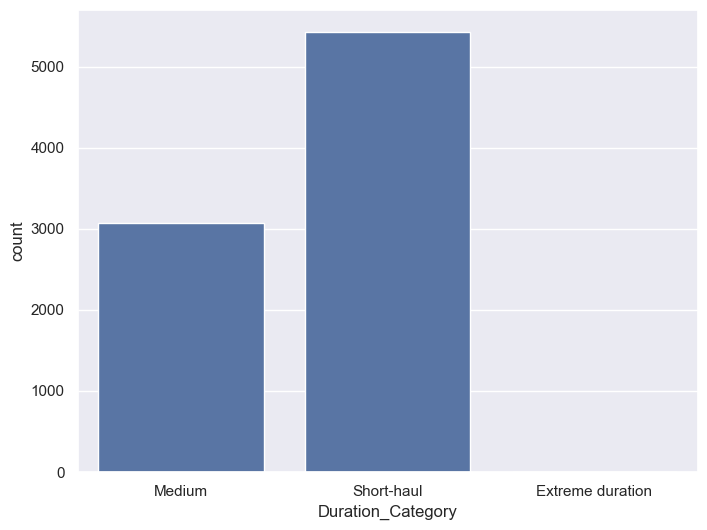

In [35]:
flight_categories = ["Short-haul", "Medium", "Long-haul"]
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains('0h|1h|2h|3h|4h')),
    (planes["Duration"].str.contains("5h|6h|7h|8h|9h")),
    (planes["Duration"].str.contains("10h|11h|12h|13h|14h|15h|16h"))
]
 
# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")
 
# Plot the counts of each category
print(planes[['Duration','Duration_Category']].head(5))
sns.countplot(data=planes, x="Duration_Category")

  Duration Duration_Category
0      19h  Extreme duration
1   5h 25m            Medium
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m         Long-haul


<Axes: xlabel='Duration_Category', ylabel='count'>

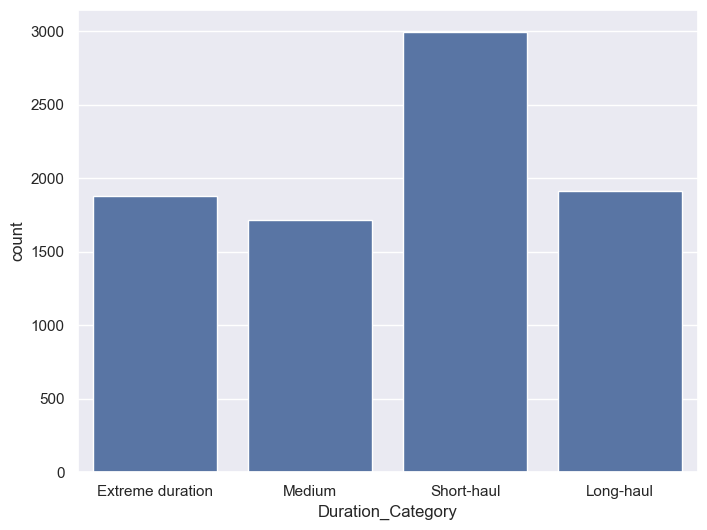

In [36]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains('(?<![1-9])0h|(?<![1-9])1h|(?<![1-9])2h|(?<![1-9])3h|(?<![1-9])4h', regex = True)),
    (planes["Duration"].str.contains("(?<![1-9])5h|(?<![1-9])6h|(?<![1-9])7h|(?<![1-9])8h|(?<![1-9])9h", regex = True)), 
    (planes["Duration"].str.contains("10h|11h|12h|13h|14h|15h|16h"))
]
 
# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")
 
# Plot the counts of each category
print(planes[['Duration','Duration_Category']].head(5))
sns.countplot(data=planes, x="Duration_Category")

  Duration Duration_Category
0      19h      Extreme-haul
1   5h 25m       Medium-haul
2   4h 45m        Short-haul
3   2h 25m        Short-haul
4  15h 30m         Long-haul


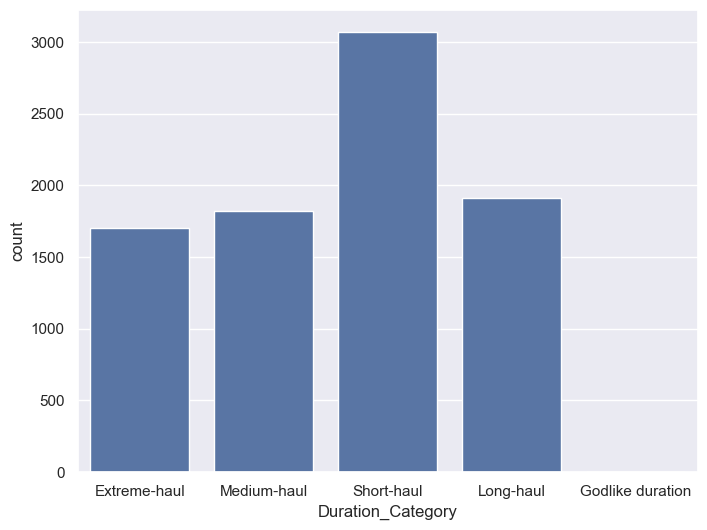

In [37]:
flight_categories = ['Extreme-haul',"Long-haul", "Medium-haul", "Short-haul"]
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains("17h|18h|19h|20h|21h|22h|23h|24h|25h|26h|27h|28h")),
    (planes["Duration"].str.contains("10h|11h|12h|13h|14h|15h|16h")),
    (planes["Duration"].str.contains("5h|6h|7h|8h|9h")),
    (planes["Duration"].str.contains('0h|1h|2h|3h|4h'))
]
 
# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories, default="Godlike duration")
 
# Plot the counts of each category
print(planes[['Duration','Duration_Category']].head())
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [38]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [39]:
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")

planes["Duration"] = planes["Duration"].astype("float")
planes["Duration"].head()

0    19.00
1     5.25
2     4.45
3     2.25
4    15.30
Name: Duration, dtype: float64

In [45]:
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())
print(planes[["Airline","airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [46]:
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())
print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
Name: count, dtype: int64


In [47]:
planes["price_destination_mean"] = planes.groupby(["Destination"])["Price"].transform(lambda x: x.mean())
print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64
